# Spotify and YouTube Music Data Analysis

This notebook performs an in-depth analysis of the combined Spotify and YouTube music dataset. The goal is to uncover insights into music popularity across these two major platforms, understand the characteristics of popular songs, and identify potential correlations between audio features and audience engagement.

## Table of Contents
1.  Data Loading and Initial Exploration
2.  Missing Values Analysis
3.  Descriptive Statistics
4.  Correlation Analysis
5.  Distribution of Key Audio Features
6.  Relationship between Spotify Streams and YouTube Views
7.  Top Songs/Artists by Streams and Views
8.  Audio Features vs. Popularity
9.  Streamlit Dashboard Integration


## 1. Data Loading and Initial Exploration

This section focuses on loading the dataset into a pandas DataFrame and performing initial checks to understand its structure, data types, and a glimpse of the raw data.


In [2]:
import pandas as pd
df = pd.read_csv('Spotify Youtube Dataset.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


### Displaying the First Few Rows

Let's inspect the first few rows of the DataFrame to get a sense of the data structure and content.


In [3]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


### Data Information

The `info()` method provides a concise summary of the DataFrame, including the number of entries, column names, non-null values, and data types.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

## 2. Missing Values Analysis

It's crucial to identify and handle missing values as they can affect the accuracy of our analysis. This section checks for any null values across all columns.


In [5]:
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

## 3. Descriptive Statistics

The `describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding `NaN` values.


In [6]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


## 4. Correlation Analysis

Understanding the relationships between different features is crucial. This section computes and visualizes the correlation matrix for numerical features, highlighting how Spotify audio features relate to YouTube engagement metrics.


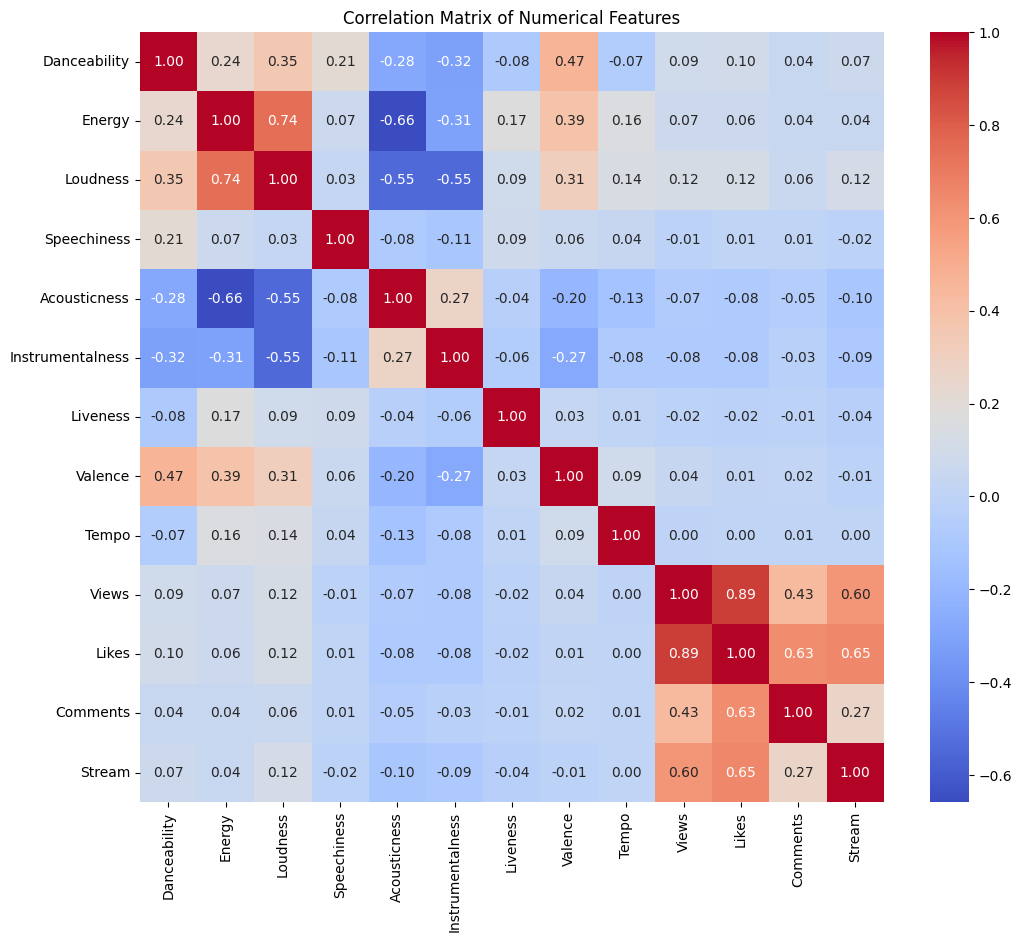

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Views", "Likes", "Comments", "Stream"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 5. Distribution of Key Audio Features

Visualizing the distribution of key audio features helps us understand the general characteristics of the songs in our dataset. We'll plot histograms for Danceability, Energy, and Valence.


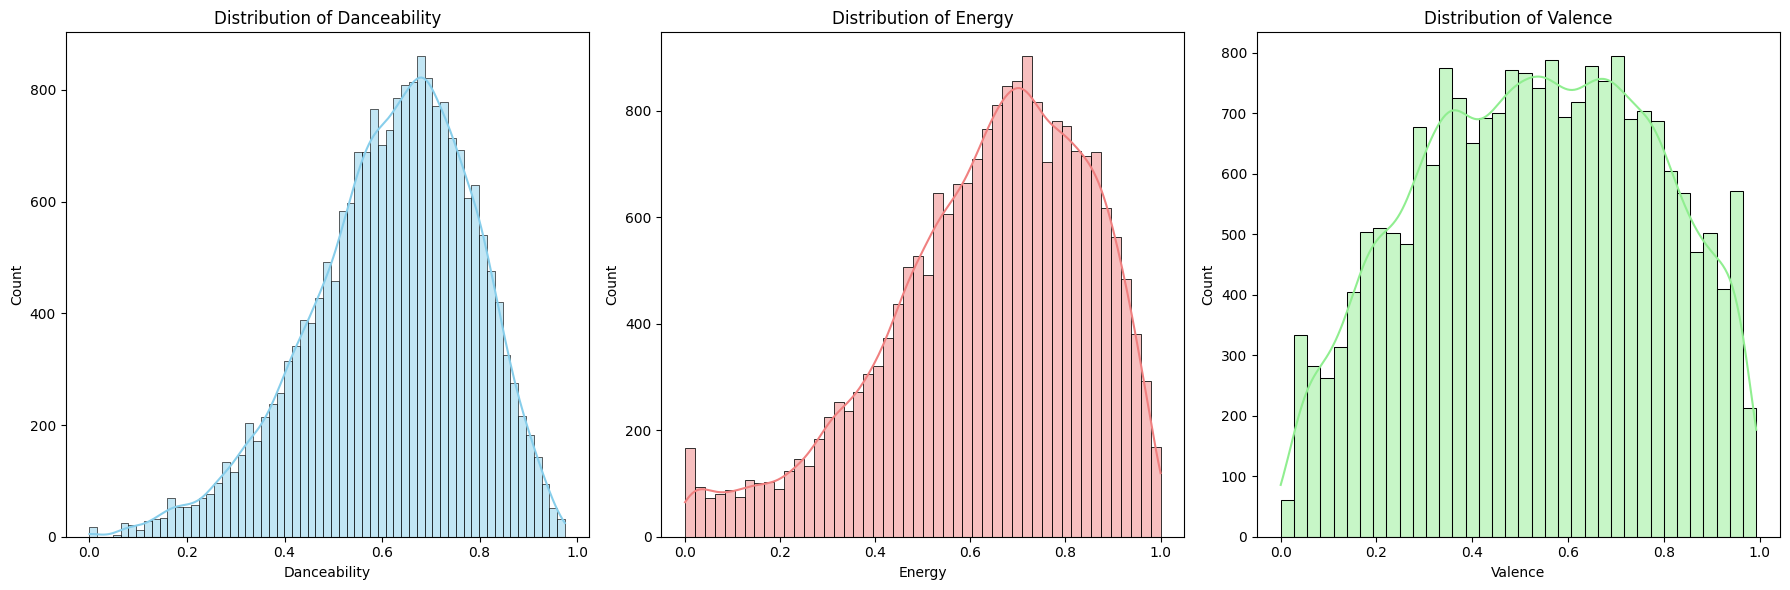

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Danceability'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Danceability')
sns.histplot(df['Energy'], ax=axes[1], kde=True, color='lightcoral')
axes[1].set_title('Distribution of Energy')
sns.histplot(df['Valence'], ax=axes[2], kde=True, color='lightgreen')
axes[2].set_title('Distribution of Valence')
plt.tight_layout()
plt.show()

## 6. Relationship between Spotify Streams and YouTube Views

This section explores the relationship between a song's popularity on Spotify (Streams) and its engagement on YouTube (Views). A scatter plot will help visualize this correlation.


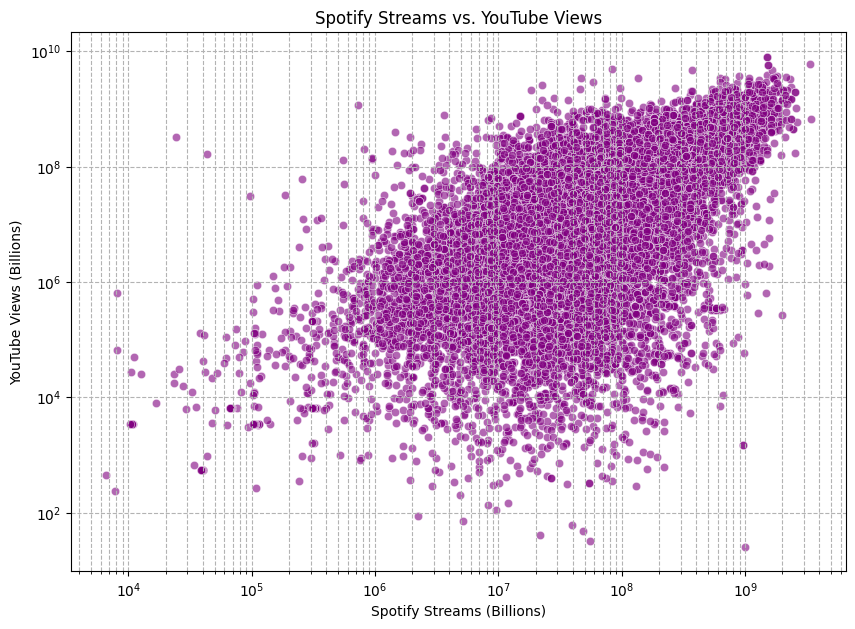

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Stream', y='Views', alpha=0.6, color='purple')
plt.title('Spotify Streams vs. YouTube Views')
plt.xlabel('Spotify Streams (Billions)')
plt.ylabel('YouTube Views (Billions)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", c="0.7")
plt.show()

## 7. Top Songs/Artists by Streams and Views

Identifying the top-performing songs and artists on both platforms provides insights into what resonates with audiences. We'll look at the top 10 songs by Spotify Streams and YouTube Views.


In [10]:
# Top 10 Songs by Spotify Streams
top_spotify_songs = df.nlargest(10, 'Stream')[['Artist', 'Track', 'Stream']]
print("Top 10 Songs by Spotify Streams:")
print(top_spotify_songs)

# Top 10 Songs by YouTube Views
top_youtube_songs = df.nlargest(10, 'Views')[['Artist', 'Track', 'Views']]
print("Top 10 Songs by YouTube Views:")
print(top_youtube_songs)

Top 10 Songs by Spotify Streams:
                 Artist                                          Track  \
15250        The Weeknd                                Blinding Lights   
12452        Ed Sheeran                                   Shape of You   
19186     Lewis Capaldi                              Someone You Loved   
17937       Post Malone                     rockstar (feat. 21 Savage)   
17445          Swae Lee  Sunflower - Spider-Man: Into the Spider-Verse   
17938       Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
13503             Drake                                      One Dance   
16028            Halsey                                         Closer   
16099  The Chainsmokers                                         Closer   
14030   Imagine Dragons                                       Believer   

             Stream  
15250  3.386520e+09  
12452  3.362005e+09  
19186  2.634013e+09  
17937  2.594927e+09  
17445  2.538330e+09  
17938  2.538330e+09 

## 8. Audio Features vs. Popularity

This section investigates how specific audio features might influence a song's popularity on Spotify and YouTube. We'll use scatter plots to visualize these relationships.


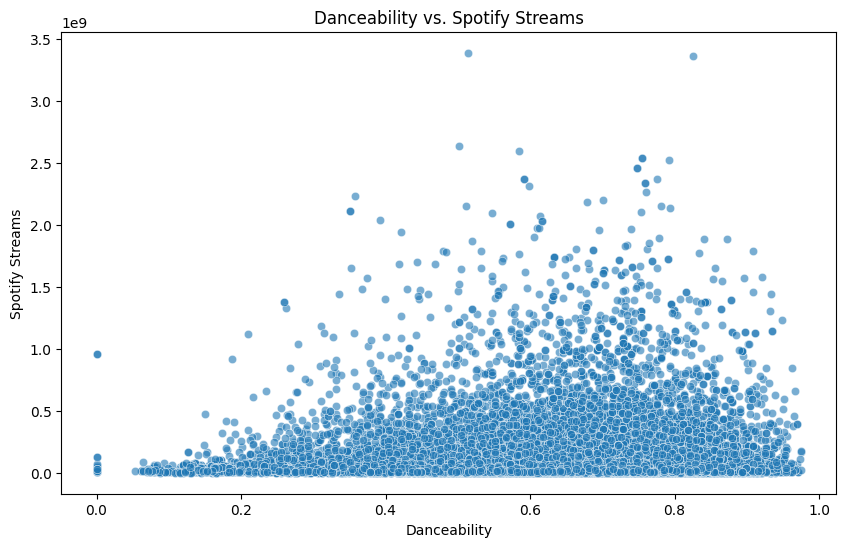

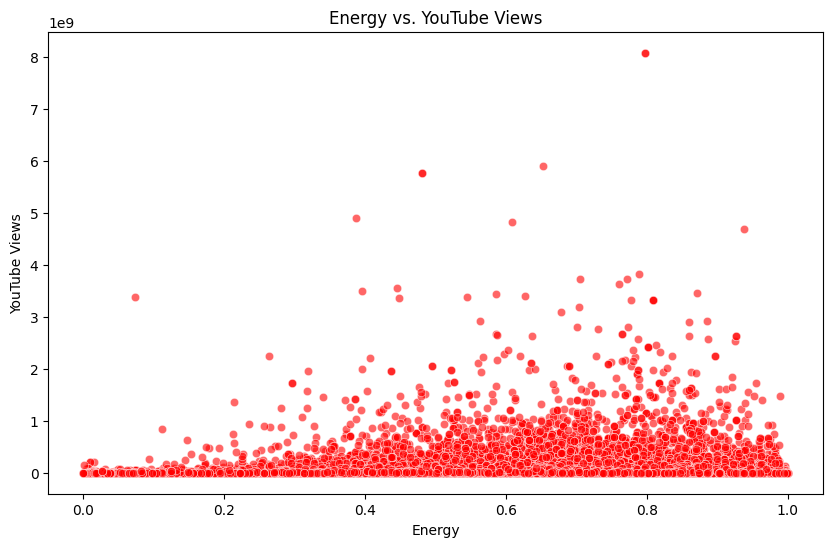

In [11]:
# Danceability vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Danceability', y='Stream', alpha=0.6)
plt.title('Danceability vs. Spotify Streams')
plt.xlabel('Danceability')
plt.ylabel('Spotify Streams')
plt.show()

# Energy vs. Views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Energy', y='Views', alpha=0.6, color='red')
plt.title('Energy vs. YouTube Views')
plt.xlabel('Energy')
plt.ylabel('YouTube Views')
plt.show()